## Implementation of ML Algorithm on heart_disease_dataset 

### EDA and Feature Engineering

1) Data Cleaning

2) Graphical Analysis

3) Outliers Detection

4) Removal of Outliers



### Algorithms 

1) Logistic Regression,
   Accuracy got - 82.60% 
   
2) Support Vector Classifier,
    Accuracy got - 80.4%
    
3) Decision Tree,
   Accuracy got -  67.39%
   
4) Random Forest,
   Accuracy got - 80.4% 
   
5) Bagging Classifier,
   Accuracy got - 69.5%
   
6) Adaboost Classifier,
   Accuracy got - 76.08%
   
7) Gradient Boosting Classfier,
   Accuracy got - 80.4%
   
8) XGBoost Classifier,
   Accuracy got - 76.08%

### Importing the Libraries for Data Cleaning , Preprocessing , Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Importing the dataset

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
## We have 303 rows and 14 columns

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Attribute Information:

1) age

2) sex

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6) fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11) the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    The names and social security numbers of the patients were recently removed from the database,         replaced with dummy values.
    
14) The "target" field refers to the presence of heart disease in the patient. It is integer valued 0     = no disease and 1 = disease

In [6]:
## Checking the null values

df.isnull().sum().sum()

0

#### We have zero null values in our dataset

#### Statistical Analysis 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:>

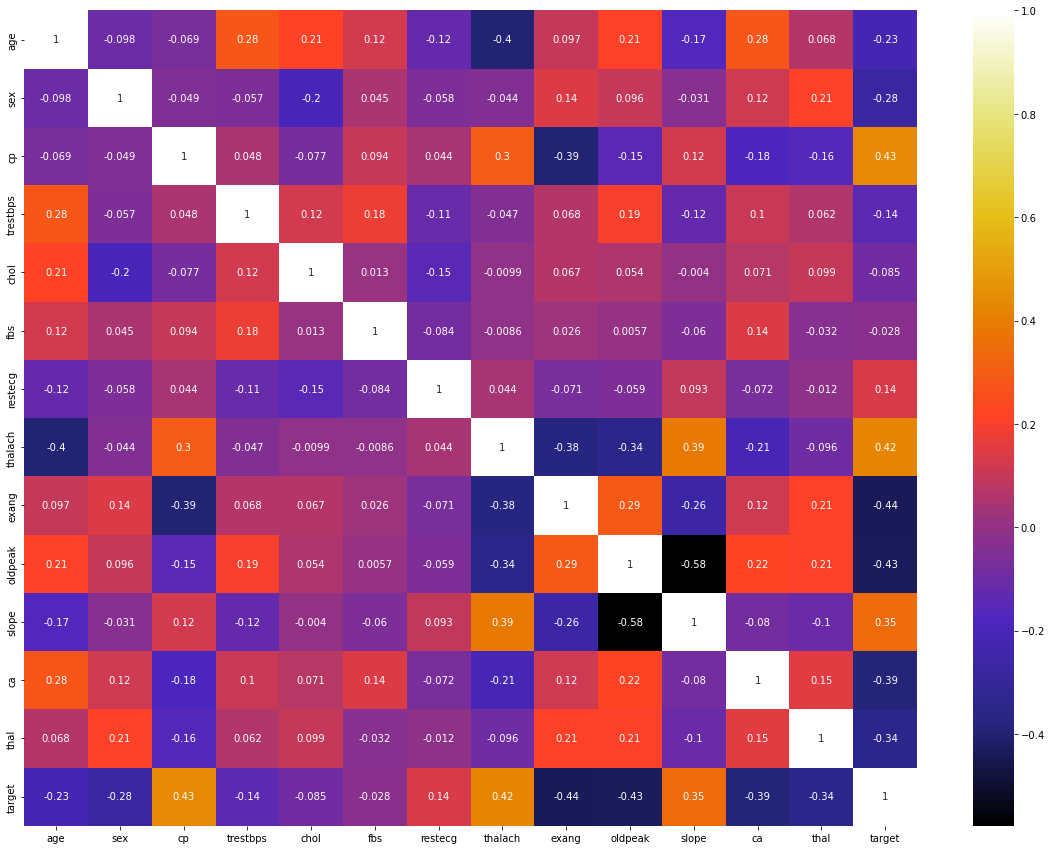

In [8]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap="CMRmap", annot=True)

In [9]:
df.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
sex,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


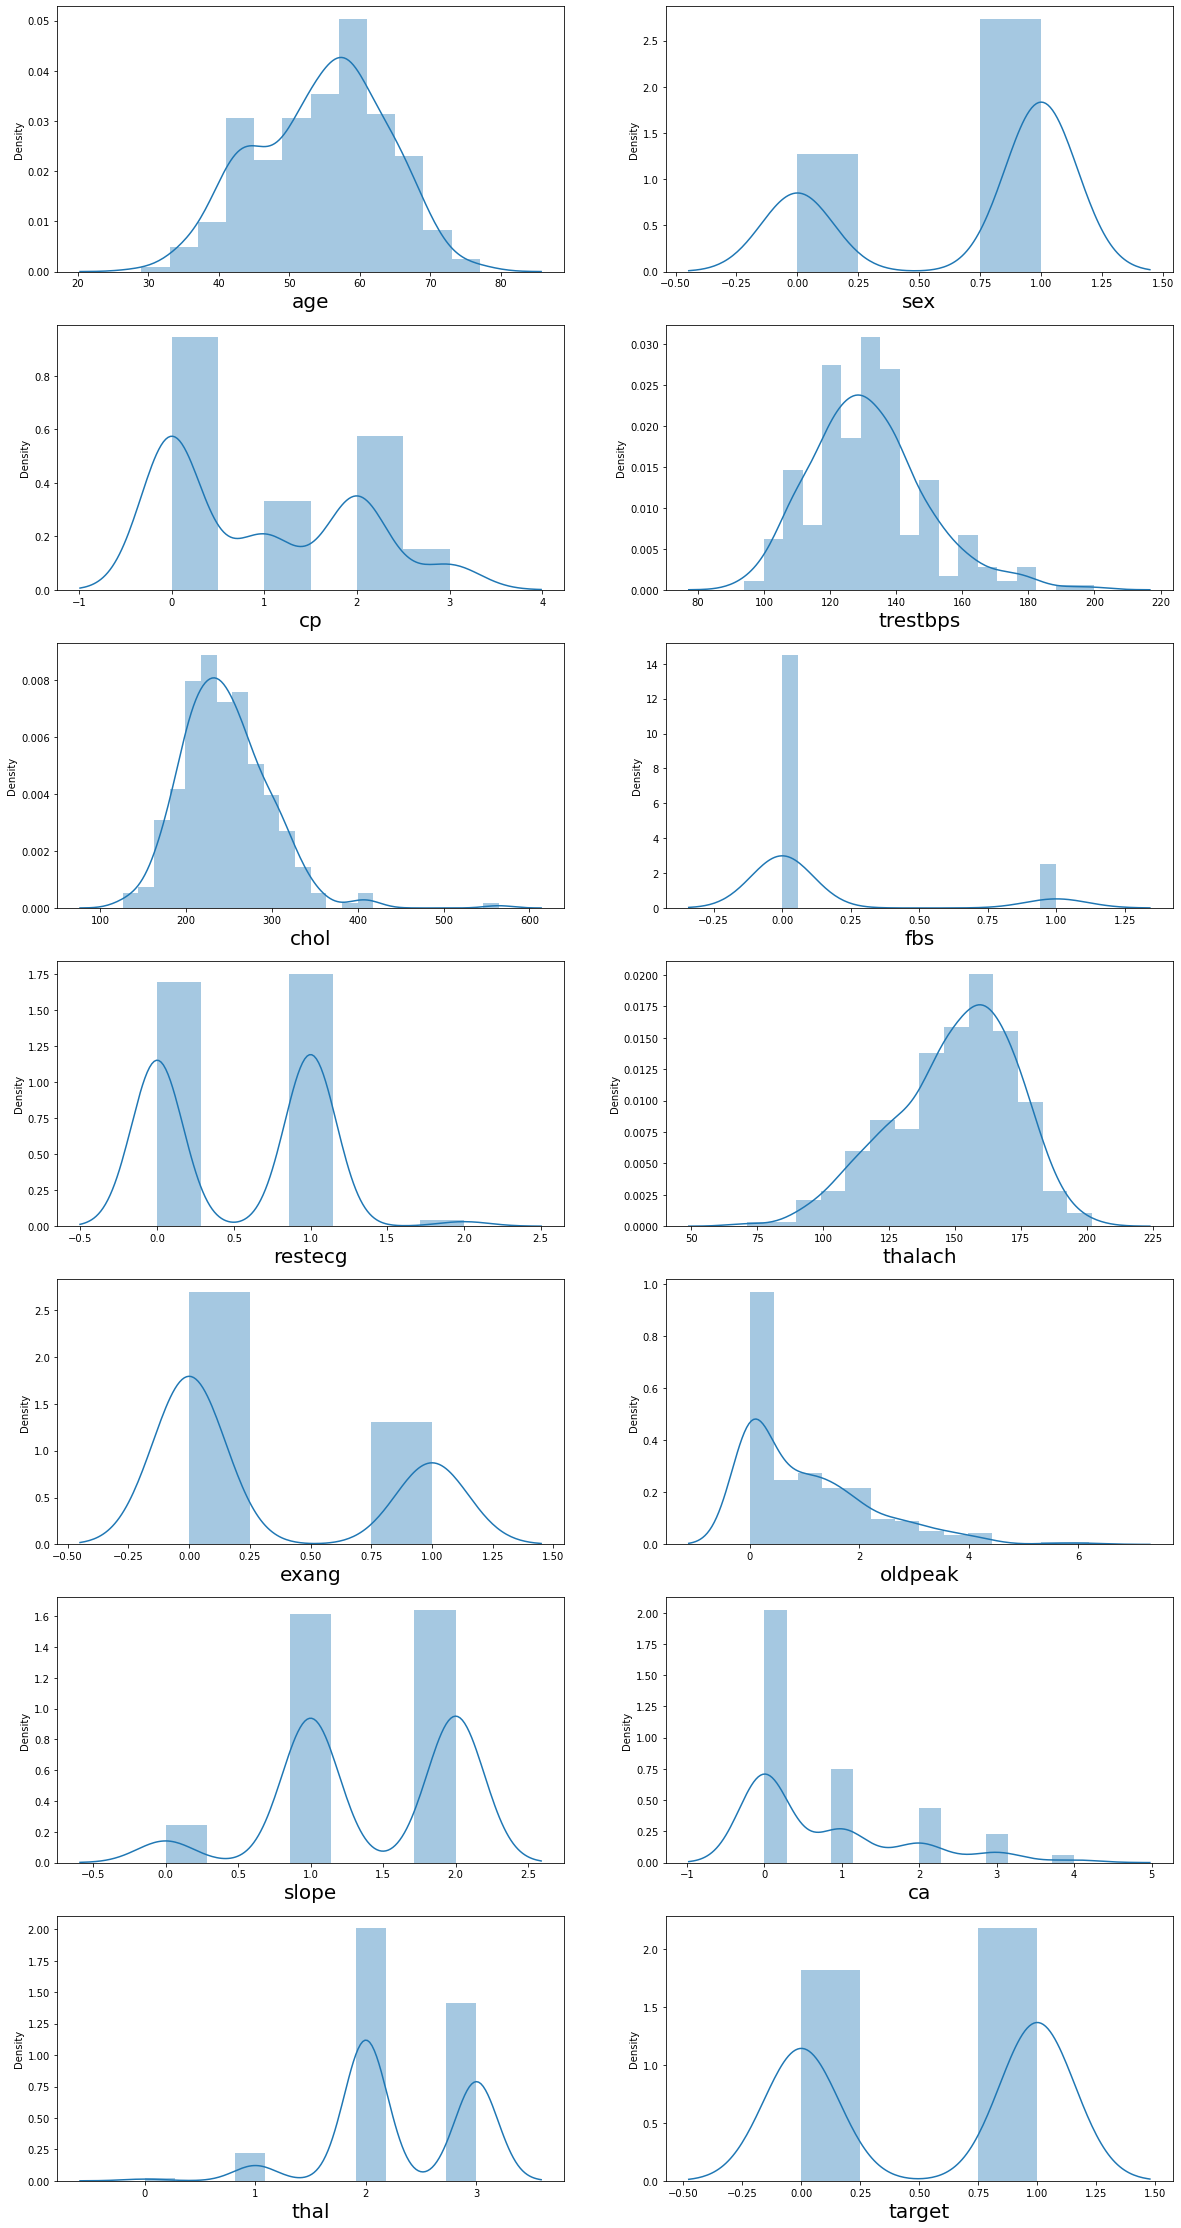

In [11]:
### Checking the distribution of the features

plt.figure(figsize=(20,40),facecolor='white')
pltnumber = 1

for column in df:
    if pltnumber<=14:      ## Since there are 14 columns
        ax = plt.subplot(7,2,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.show()
    

#### Here we can see some outliers in some features

### Outliers Detection and Removal Approaches

Identifying outliers with visualization

Z-score method

Interquartile Range Method( IQR ) method

Compare Skewness

#### Z-score:
##### The number of standard deviations away from the mean that a particular observation is.
##### A negative Z-score means an observation is below the mean.
##### while a positive Z-score means means it above the mean.
##### The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [12]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [13]:
for i in df.columns:
    print("lower limit and upper limit of {} is {} ".format(i,outlier_thresholds(df,i)))

lower limit and upper limit of age is (6.0, 102.0) 
lower limit and upper limit of sex is (-1.5, 2.5) 
lower limit and upper limit of cp is (-3.0, 5.0) 
lower limit and upper limit of trestbps is (47.0, 215.0) 
lower limit and upper limit of chol is (6.799999999999983, 490.0) 
lower limit and upper limit of fbs is (-1.5, 2.5) 
lower limit and upper limit of restecg is (-1.5, 2.5) 
lower limit and upper limit of thalach is (25.099999999999966, 267.50000000000006) 
lower limit and upper limit of exang is (-1.5, 2.5) 
lower limit and upper limit of oldpeak is (-4.199999999999999, 6.999999999999999) 
lower limit and upper limit of slope is (-0.5, 3.5) 
lower limit and upper limit of ca is (-3.0, 5.0) 
lower limit and upper limit of thal is (0.5, 4.5) 
lower limit and upper limit of target is (-1.5, 2.5) 


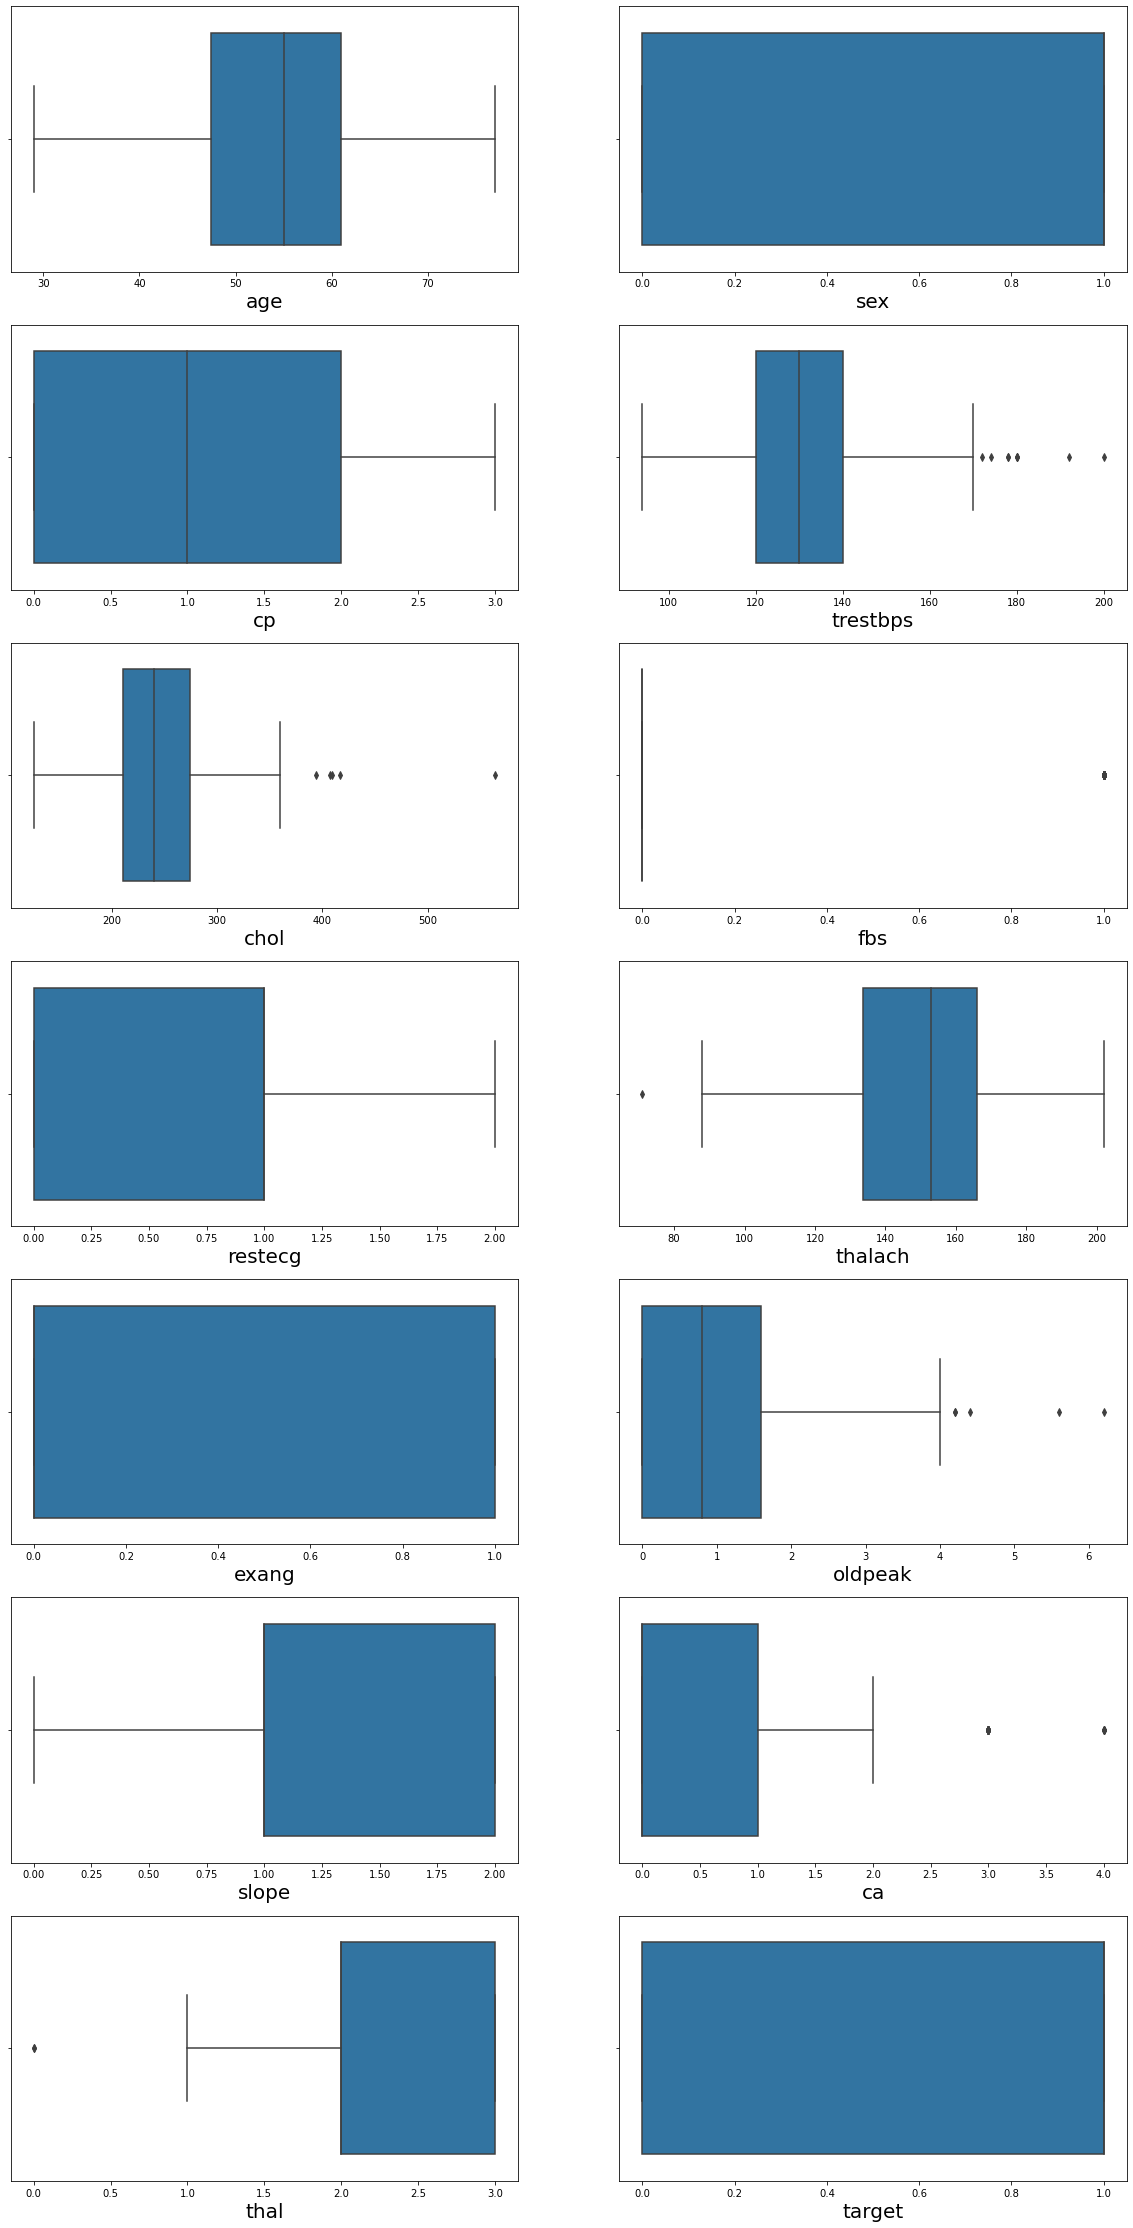

In [14]:
plt.figure(figsize=(20,40))
pltnumber = 1

for column in df:
    if pltnumber<=14:      ## Since there are 14 columns
        ax = plt.subplot(7,2,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.show()
    

#### So , we got outliers in trestbps,chol,fbs,thalach,oldpeak,ca,thal

In [15]:
## function to remove outliers
def replace_with_thresholds(dataframe,columns):
    for variable in columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [16]:
replace_with_thresholds(df,df.columns)

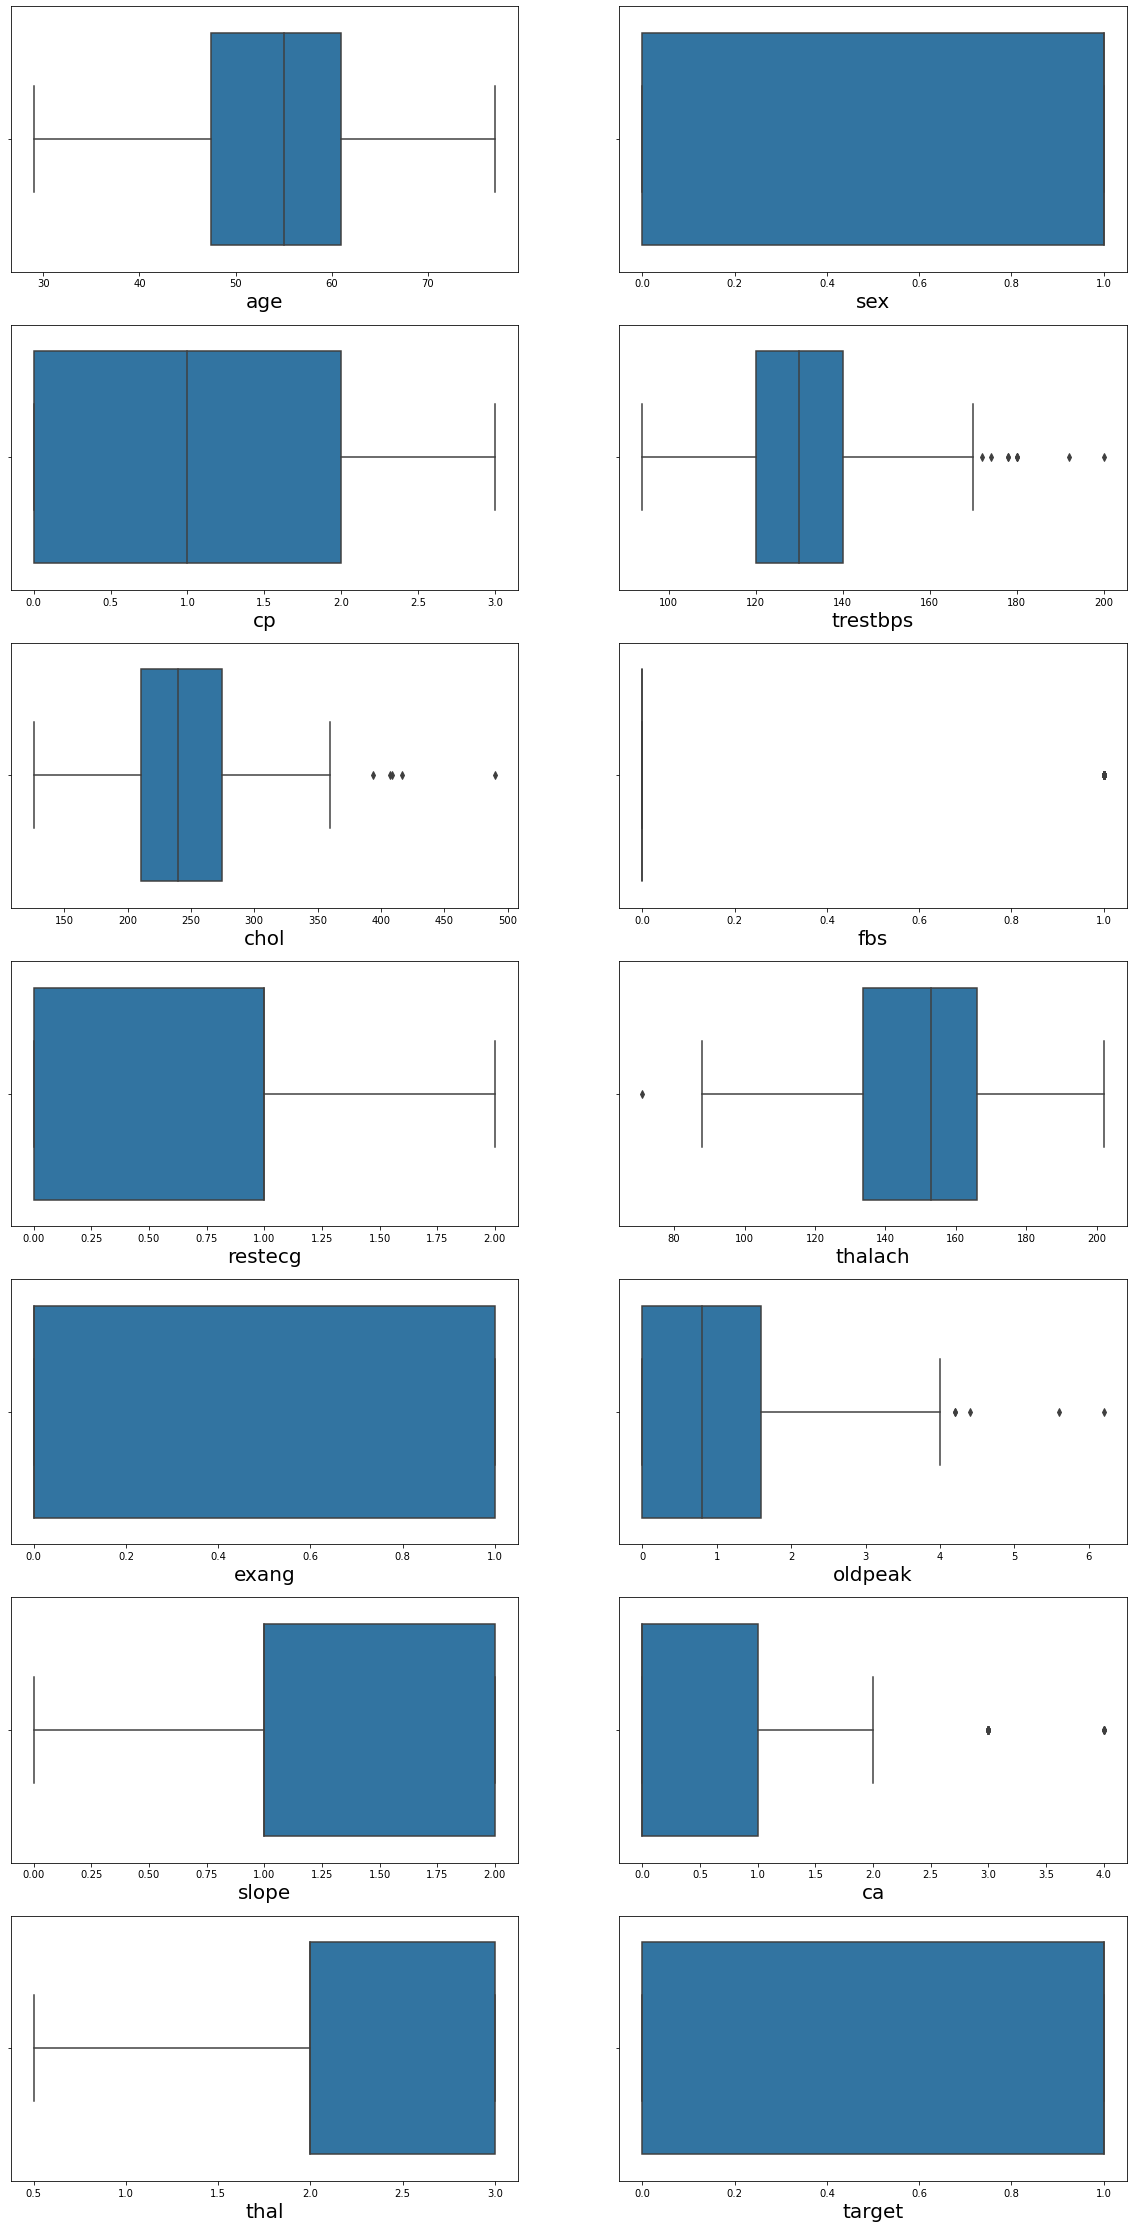

In [17]:
plt.figure(figsize=(20,40))
pltnumber = 1

for column in df:
    if pltnumber<=14:      ## Since there are 14 columns
        ax = plt.subplot(7,2,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.show()
    

#### As we can see from above boxplots outliers are not removed properly

### Interquartile Range Method( IQR ) method

In [18]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [19]:
remove_outliers_IQR('trestbps')

percentile25 120.0
percentile75 140.0
Upper limit 170.0
Lower limit 90.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [20]:
remove_outliers_IQR('chol')

percentile25 211.0
percentile75 274.5
Upper limit 369.75
Lower limit 115.75


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [21]:
remove_outliers_IQR('fbs')

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [22]:
remove_outliers_IQR('thalach')

percentile25 133.5
percentile75 166.0
Upper limit 214.75
Lower limit 84.75


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [23]:
remove_outliers_IQR('oldpeak')

percentile25 0.0
percentile75 1.6
Upper limit 4.0
Lower limit -2.4000000000000004


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [24]:
remove_outliers_IQR('ca')

percentile25 0.0
percentile75 1.0
Upper limit 2.5
Lower limit -1.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [25]:
remove_outliers_IQR('thal')

percentile25 2.0
percentile75 3.0
Upper limit 4.5
Lower limit 0.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [26]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

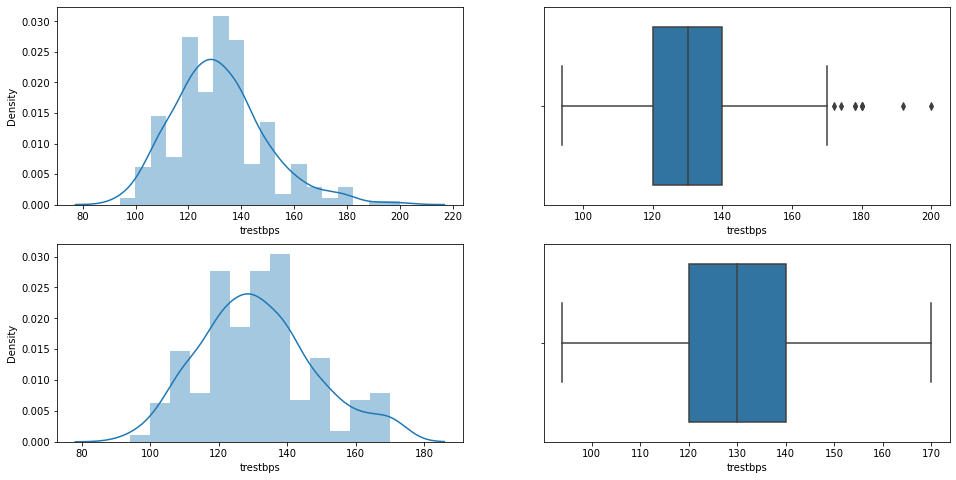

In [27]:
create_comparison_plot(df,df1,'trestbps')

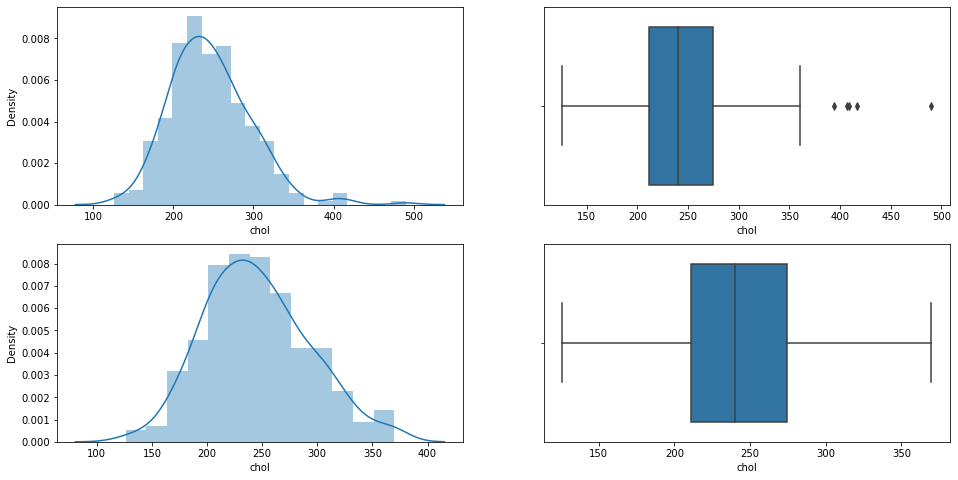

In [28]:
create_comparison_plot(df,df1,'chol')

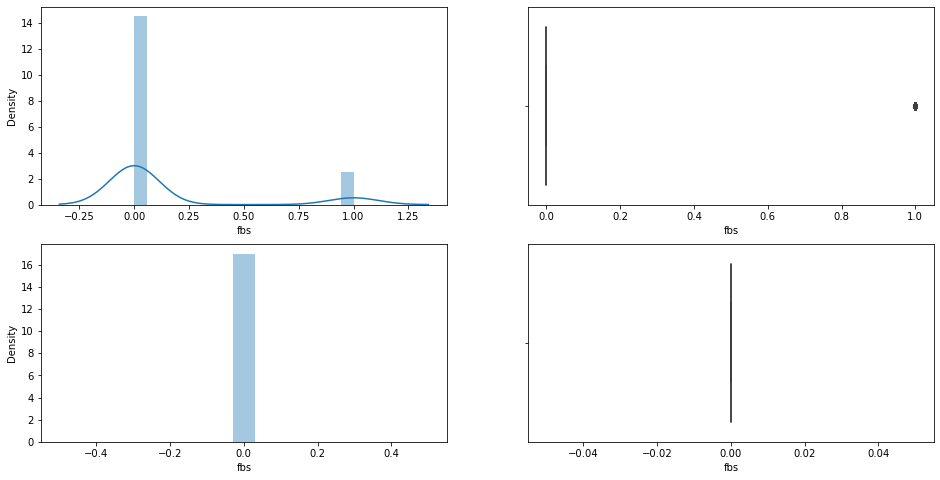

In [29]:
create_comparison_plot(df,df1,'fbs')

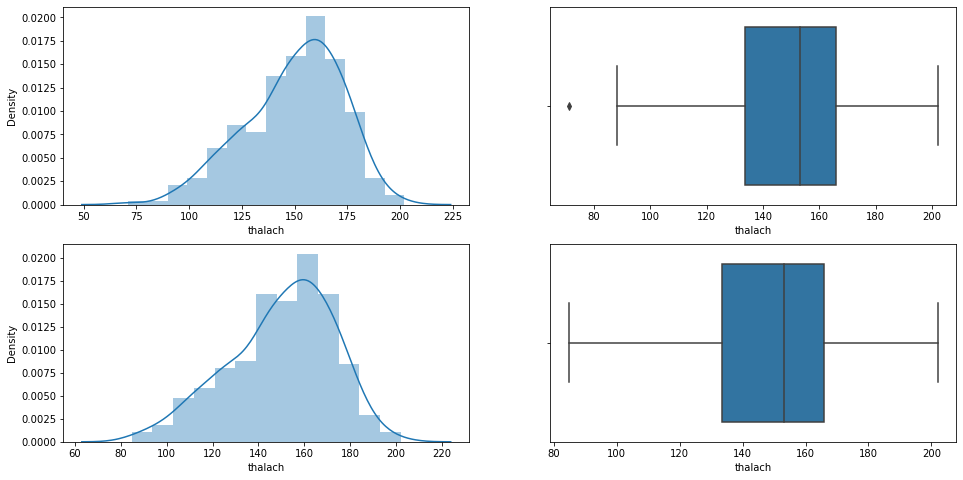

In [30]:
create_comparison_plot(df,df1,'thalach')

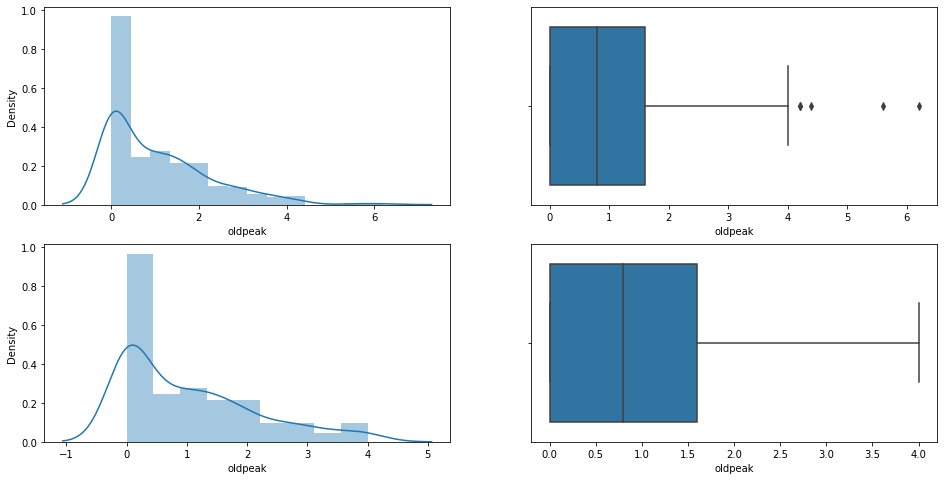

In [31]:
create_comparison_plot(df,df1,'oldpeak')

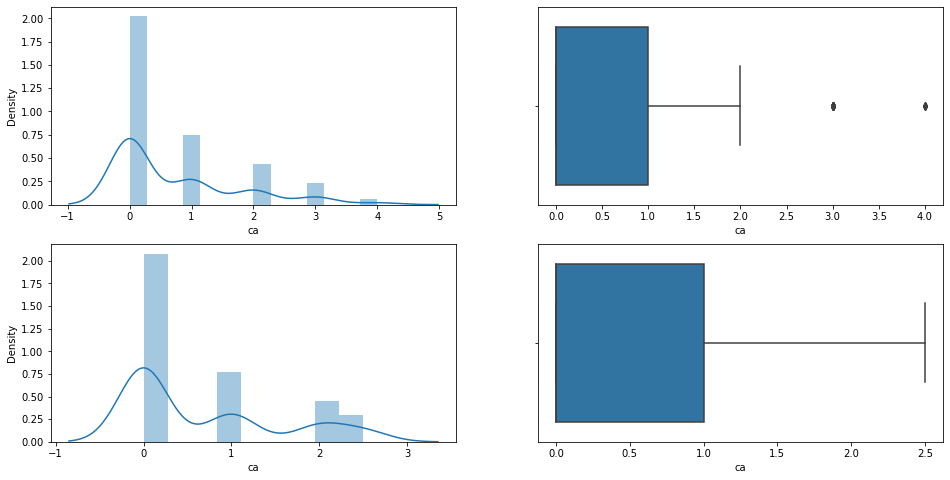

In [32]:
create_comparison_plot(df,df1,'ca')

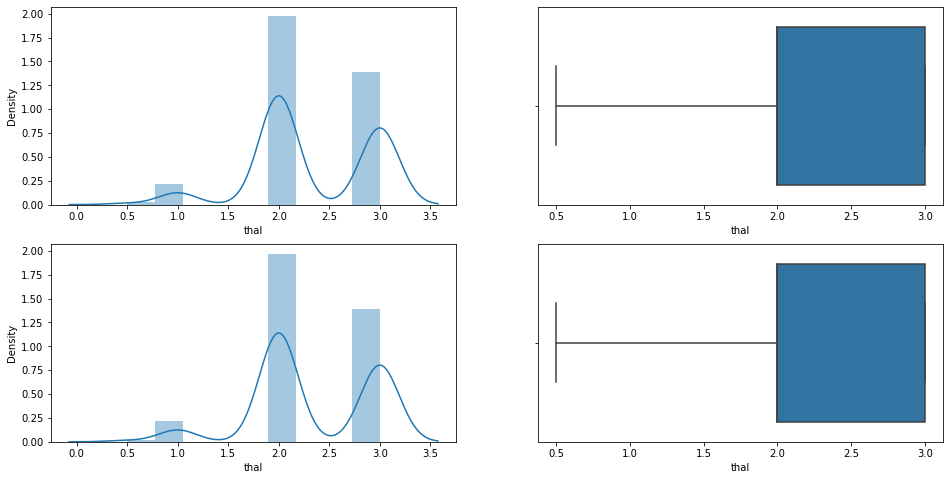

In [33]:
create_comparison_plot(df,df1,'thal')

### Compare skewness 

In [34]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        0.796014
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.323530
target     -0.179821
dtype: float64

In [35]:
df1.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.386367
chol        0.333267
fbs         0.000000
restecg     0.162522
thalach    -0.493392
exang       0.742532
oldpeak     0.997885
slope      -0.508316
ca          0.919045
thal       -0.323530
target     -0.179821
dtype: float64

#### Skewness is reduced after we have removed ouliers using IQR Method

### Splitting the Dataset into dependent and independent features 

In [36]:
X = df1.drop(columns = ['target'])
y = df1['target']

### Relationship between dependent and independent features

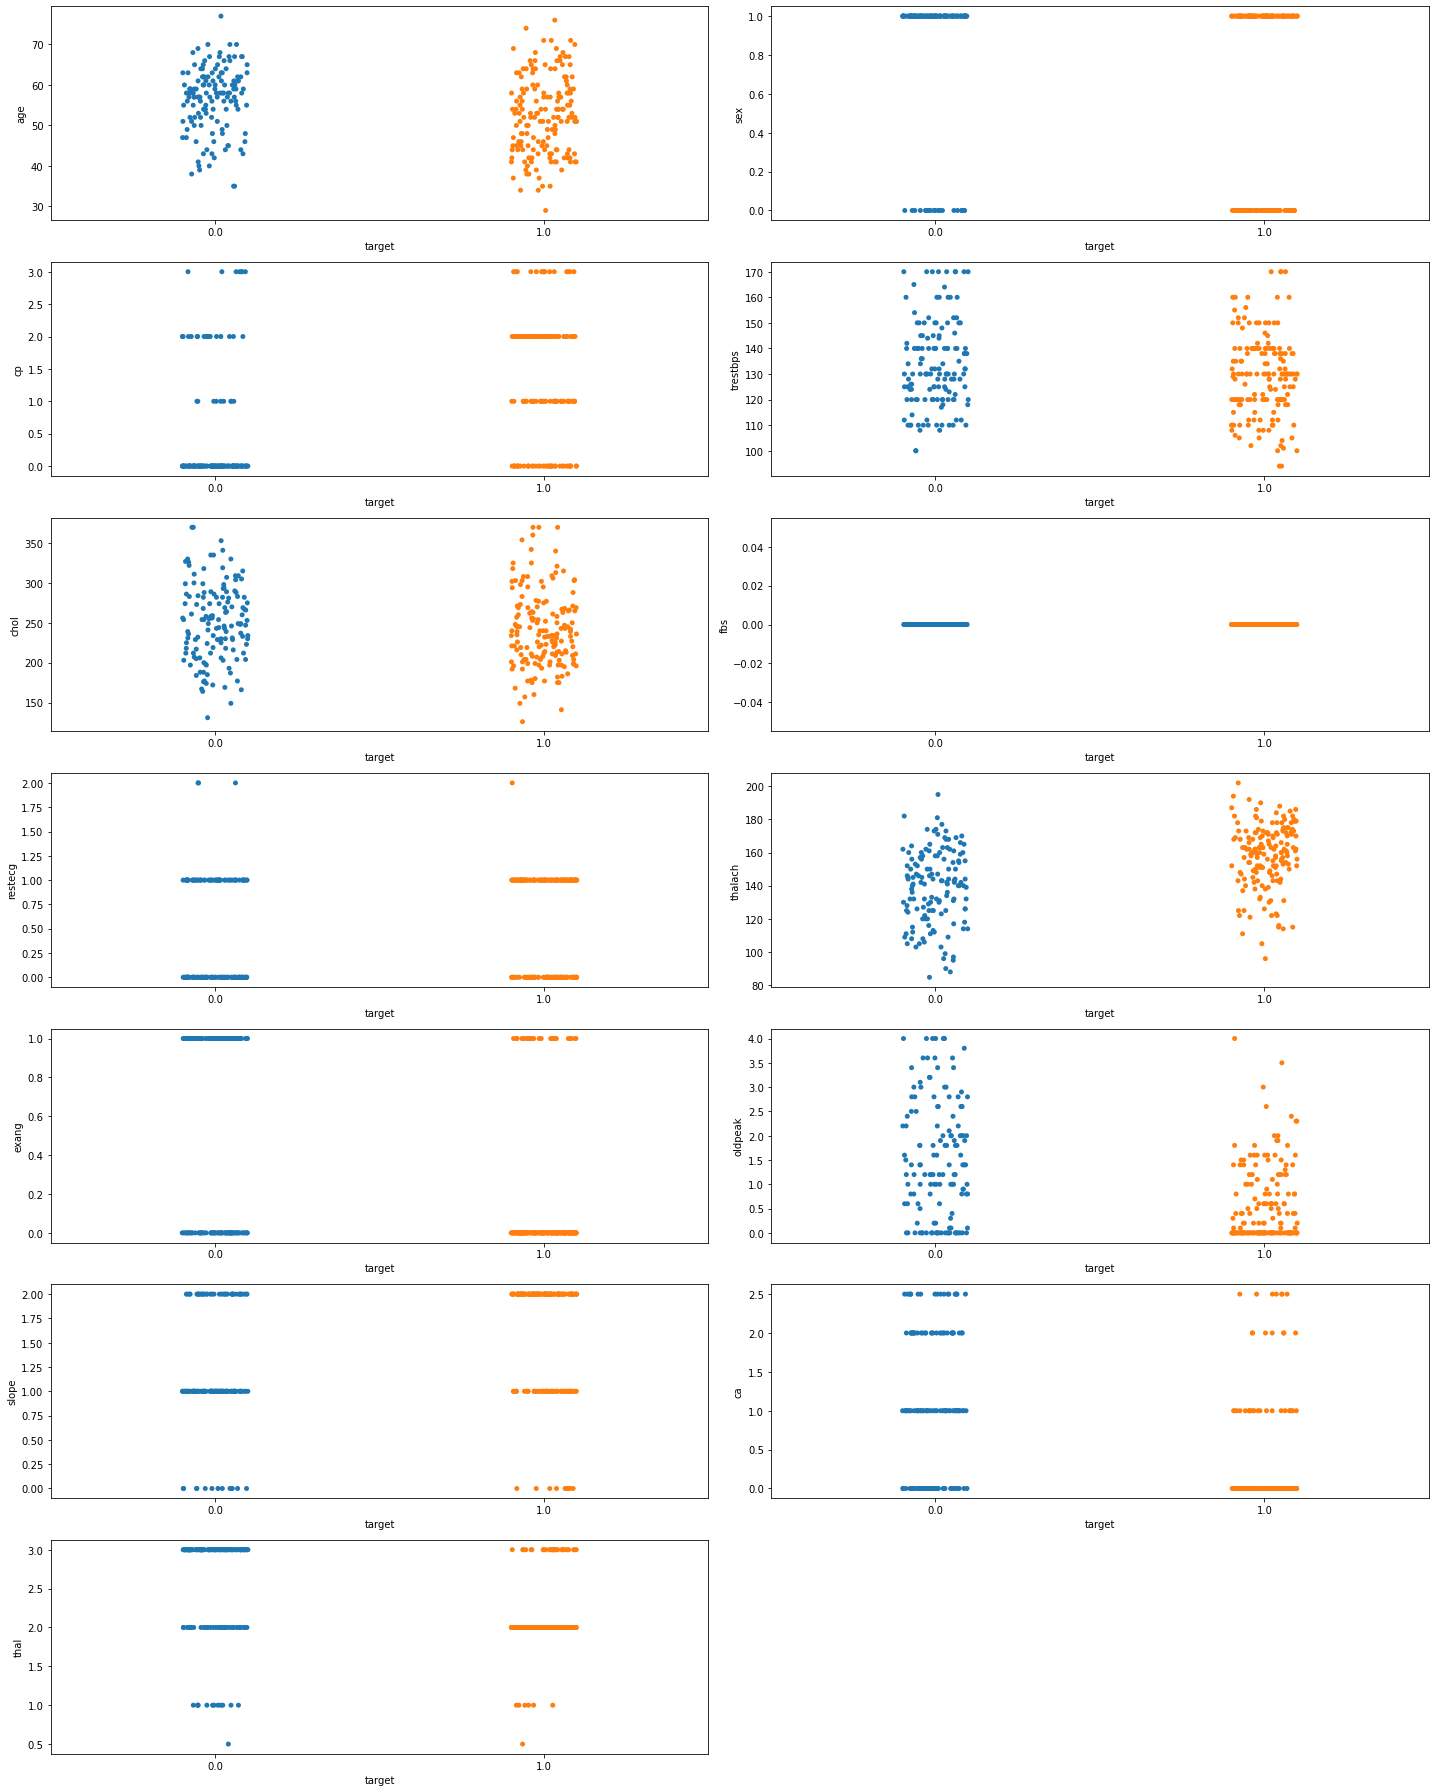

In [37]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=13 :
        ax = plt.subplot(7,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

### Graphical Analysis between dependent and independent features

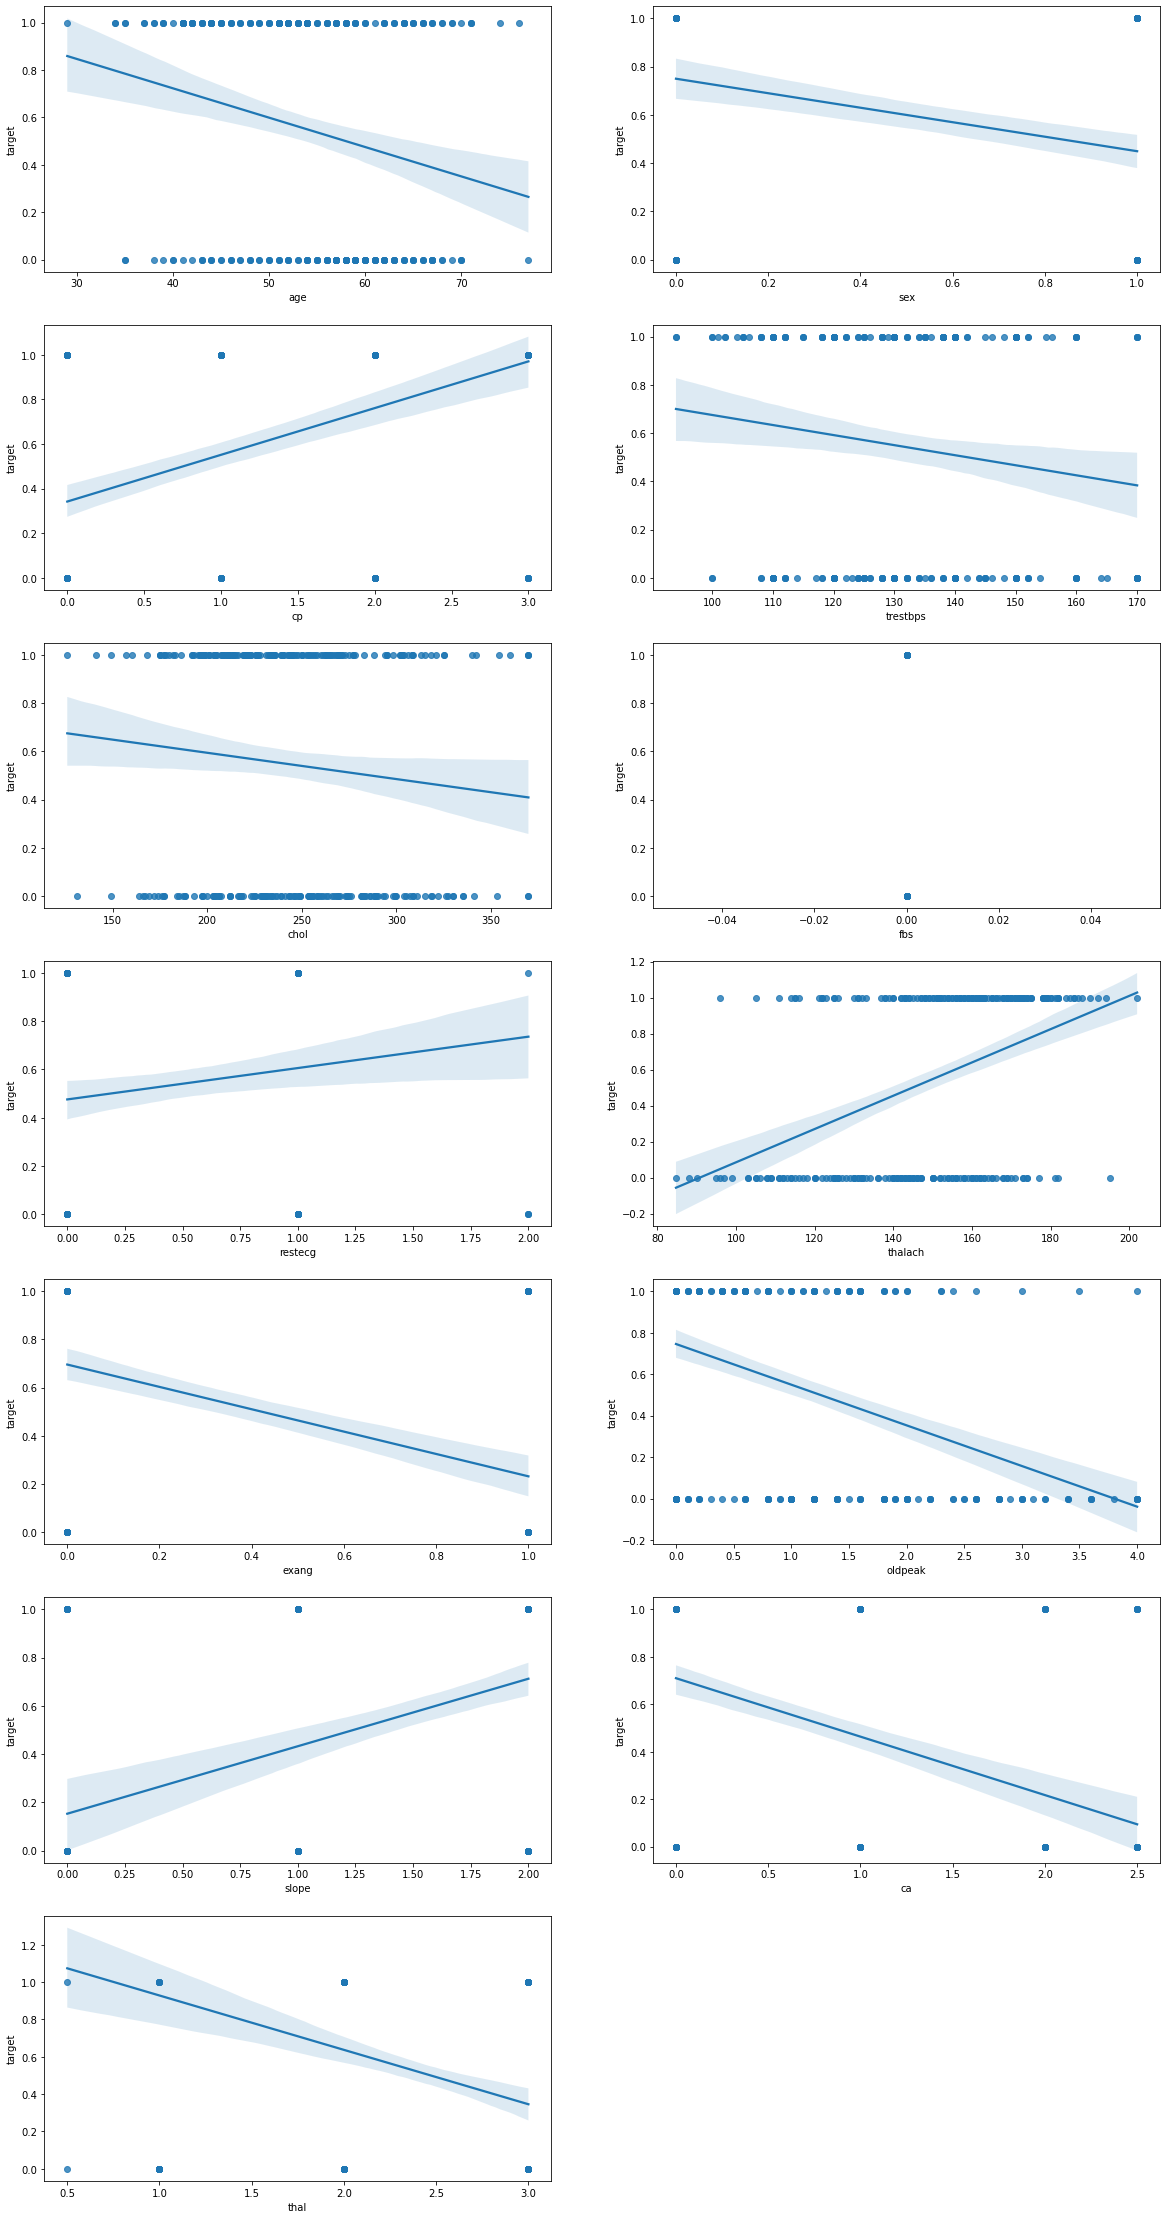

In [38]:
plt.figure(figsize=(20,40))
for i in enumerate(X.columns):
    plt.subplot(7,2,i[0]+1)
    sns.regplot(x=df1[i[1]],y=df1['target'])

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=16)

In [40]:
X_train.shape , y_train.shape

((257, 13), (257,))

In [41]:
X_test.shape , y_test.shape

((46, 13), (46,))

### Scaling 

In [42]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()


In [43]:
X_train=scalar.fit_transform(X_train)
X_train

array([[ 0.94139029, -1.44789003, -0.96097186, ..., -0.70591946,
         2.1056781 ,  1.18646406],
       [ 0.2904379 ,  0.69066019, -0.96097186, ..., -0.70591946,
         0.40391938, -2.25897395],
       [-0.57749862, -1.44789003, -0.96097186, ...,  0.95849615,
        -0.73058643, -0.53625494],
       ...,
       [ 0.50742203,  0.69066019, -0.96097186, ...,  0.95849615,
        -0.73058643, -0.53625494],
       [ 2.46027919,  0.69066019, -0.96097186, ...,  0.95849615,
         2.1056781 , -0.53625494],
       [-0.14353036,  0.69066019, -0.96097186, ..., -2.37033508,
        -0.73058643,  1.18646406]])

In [44]:
X_test = scalar.transform(X_test)

In [45]:
X_test

array([[ 2.90437901e-01, -1.44789003e+00, -9.60971864e-01,
        -2.26470782e-01,  1.23322668e+00,  0.00000000e+00,
        -1.01374047e+00,  4.01349267e-01, -6.78400525e-01,
        -9.03547319e-01,  9.58496152e-01,  4.03919384e-01,
        -5.36254944e-01],
       [ 5.07422030e-01,  6.90660187e-01,  9.76045933e-01,
        -3.47098742e-01, -5.65790788e-01,  0.00000000e+00,
         9.01930860e-01, -7.06207500e-01, -6.78400525e-01,
         1.13015353e+00, -7.05919463e-01,  4.03919384e-01,
        -2.25897395e+00],
       [ 3.98929965e-01,  6.90660187e-01,  9.76045933e-01,
        -1.19149447e+00, -3.11811851e-01,  0.00000000e+00,
        -1.01374047e+00,  6.67162891e-01, -6.78400525e-01,
         1.40747638e+00, -7.05919463e-01,  4.03919384e-01,
         1.18646406e+00],
       [ 9.41390288e-01,  6.90660187e-01,  1.94455483e+00,
         7.98866882e-01, -2.48317117e-01,  0.00000000e+00,
        -1.01374047e+00,  2.62883124e-03, -6.78400525e-01,
         1.22259448e+00, -2.37033508e

### Logistic Regression Model Training 

In [46]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [47]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [48]:
## Prediction


y_pred = classifier.predict(X_test)
y_pred

array([1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.])

In [49]:
from sklearn.metrics import accuracy_score,classification_report

In [50]:
score = accuracy_score(y_pred,y_test)
print(score)

0.8260869565217391


In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83        22
         1.0       0.90      0.75      0.82        24

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.84      0.83      0.83        46



### Support Vector Classification model 

In [52]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [54]:
y_pred

array([1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.])

In [55]:
score = accuracy_score(y_pred,y_test)
score

0.8043478260869565

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81        21
         1.0       0.90      0.72      0.80        25

    accuracy                           0.80        46
   macro avg       0.82      0.81      0.80        46
weighted avg       0.82      0.80      0.80        46



### Decision Tree Classifier model 

In [57]:
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5376712328767124, 0.9583333333333334, 'X[12] <= 0.325\ngini = 0.492\nsamples = 257\nvalue = [112, 145]'),
 Text(0.3219178082191781, 0.875, 'X[11] <= -0.163\ngini = 0.359\nsamples = 162\nvalue = [38, 124]'),
 Text(0.2054794520547945, 0.7916666666666666, 'X[9] <= 1.685\ngini = 0.181\nsamples = 109\nvalue = [11, 98]'),
 Text(0.136986301369863, 0.7083333333333334, 'X[0] <= 0.345\ngini = 0.142\nsamples = 104\nvalue = [8, 96]'),
 Text(0.0821917808219178, 0.625, 'X[12] <= -2.69\ngini = 0.026\nsamples = 75\nvalue = [1, 74]'),
 Text(0.0547945205479452, 0.5416666666666666, 'X[0] <= -0.198\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0273972602739726, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0821917808219178, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1095890410958904, 0.5416666666666666, 'gini = 0.0\nsamples = 73\nvalue = [0, 73]'),
 Text(0.1917808219178082, 0.625, 'X[7] <= -2.639\ngini = 0.366\nsamples = 29\nvalue = [7, 

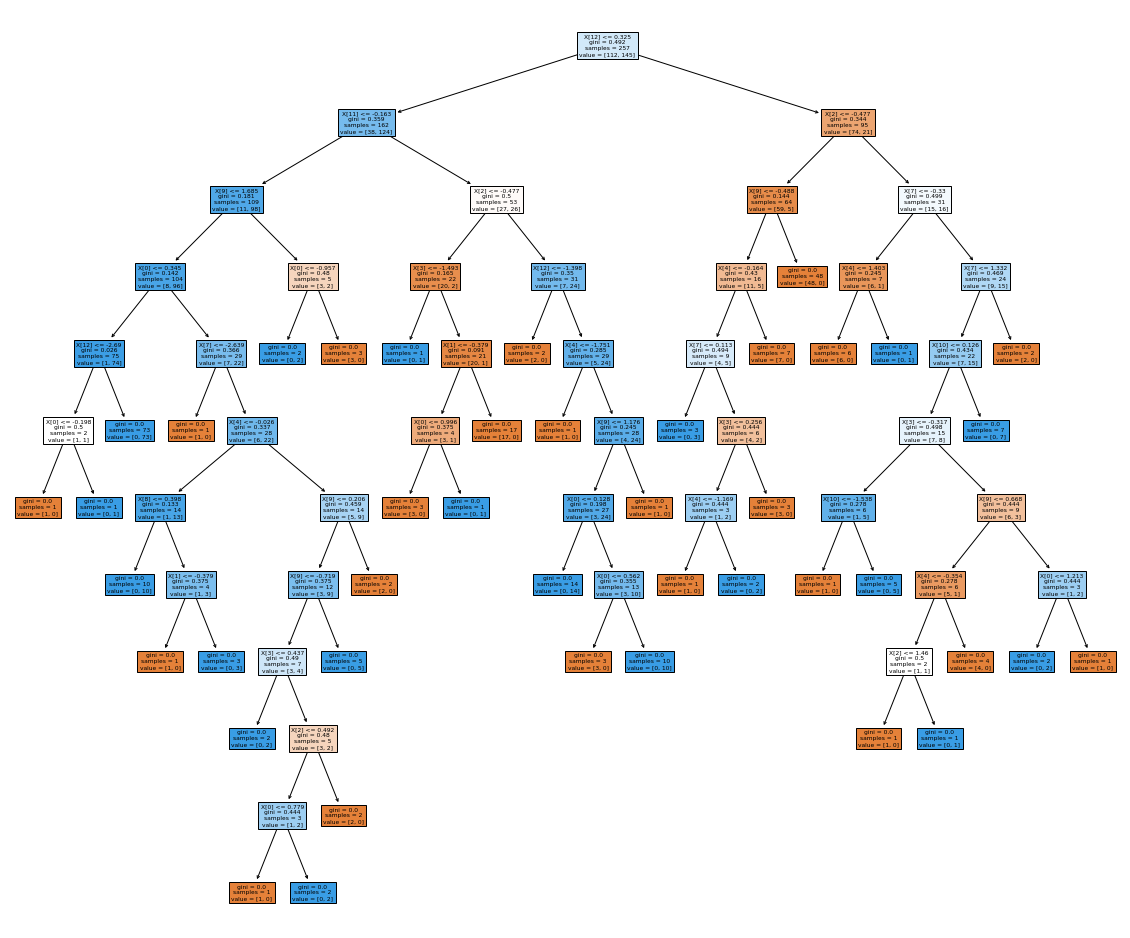

In [58]:
from sklearn import tree
plt.figure(figsize=(20,17))
tree.plot_tree(treemodel,filled=True)

In [59]:
y_pred = treemodel.predict(X_test)

In [60]:
score = accuracy_score(y_pred,y_test)
score

0.6739130434782609

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69        23
         1.0       0.70      0.61      0.65        23

    accuracy                           0.67        46
   macro avg       0.68      0.67      0.67        46
weighted avg       0.68      0.67      0.67        46



### Random forest Classification

In [62]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=50)


In [63]:
randomforest_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [64]:
y_pred = randomforest_classifier.predict(X_test)

In [65]:
y_pred

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.])

In [66]:
score = accuracy_score(y_pred,y_test)
score

0.8043478260869565

In [67]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        25
         1.0       0.80      0.76      0.78        21

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.80      0.80      0.80        46



### Ensemble Model Bagging Classifier 

In [68]:
from sklearn.ensemble import BaggingClassifier

In [69]:
BC=BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False)

In [70]:
BC.fit(X_train,y_train)

BaggingClassifier()

In [71]:
y_pred = BC.predict(X_test)

In [72]:
y_pred

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.])

In [73]:
score = accuracy_score(y_pred,y_test)
score

0.6956521739130435

In [74]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.77      0.71        22
         1.0       0.75      0.62      0.68        24

    accuracy                           0.70        46
   macro avg       0.70      0.70      0.70        46
weighted avg       0.70      0.70      0.69        46



### Adaboost Classifier model 

In [75]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [76]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [77]:
y_pred = clf.predict(X_test)

In [78]:
y_pred

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.])

In [79]:
score = accuracy_score(y_pred,y_test)
score

0.7608695652173914

In [80]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78        23
         1.0       0.80      0.70      0.74        23

    accuracy                           0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46



### Gradient Boosting Classifier 

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [83]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [84]:
y_pred = clf.predict(X_test)

In [85]:
y_pred

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [86]:
score = accuracy_score(y_pred,y_test)
score

0.8043478260869565

In [87]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        25
         1.0       0.80      0.76      0.78        21

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.80      0.80      0.80        46



### XGBoost Classifier 

In [88]:
import sys
!{sys.executable} -m pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [89]:
from xgboost import XGBClassifier

In [90]:
model =XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
y_pred = model.predict(X_test)

In [92]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0])

In [93]:
score = accuracy_score(y_pred,y_test)
score

0.7608695652173914

In [94]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.70      0.74      0.72        19

    accuracy                           0.76        46
   macro avg       0.75      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46

